### Student Information
Name:
鍾明遠

Student ID:
108011557

GitHub ID:
mchung0417

Kaggle name:
mchung0417

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

### Second,Third -kaggle competition report

before pre-processing, I do some privious work to generate the raw dataset from tweet_DM.json
#step 1 :load tweet_DM.json and translate into raw set that only have 'tweet_id' and 'text' column
#step 2 :according to 'data_identification.csv' spilt raw set into train set and test set
#step 3 :merge 'emotion.csv' and train set on 'tweet_id',then it's time to do some pre-processing

In [5]:
###pre-processing
import pandas as pd
df = pd.read_csv('trainset_sample.csv',lineterminator = '\n')
#df = pd.read_csv('testset_sample.csv',lineterminator = '\n')
df.columns = ['id','text','emotion']
df[0:5]

,id,text,emotion
0,0x30b1e3,"Tomorrow is promised to no one, so cherish the...",anticipation\r\r
1,0x31dc09,In literature Snow symbolizes either death or ...,joy\r\r
2,0x36c550,@Rachael_Swindon We live in a godless world of...,joy\r\r
3,0x27fdae,When u forget to turn on ur alarm but a truck ...,joy\r\r
4,0x24c2e6,Who the fuck gives vegemite sandwiches and smi...,disgust\r\r


In [7]:
df['emotion']=df['emotion'].apply(lambda x:x.replace('\r',''))
df[0:5]

,id,text,emotion
0,0x30b1e3,"Tomorrow is promised to no one, so cherish the...",anticipation
1,0x31dc09,In literature Snow symbolizes either death or ...,joy
2,0x36c550,@Rachael_Swindon We live in a godless world of...,joy
3,0x27fdae,When u forget to turn on ur alarm but a truck ...,joy
4,0x24c2e6,Who the fuck gives vegemite sandwiches and smi...,disgust


In [8]:
###remove @blahblah ,numbers,hashtag and <LH>
import re
import numpy as np
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,' ',input_txt)
    return input_txt
df['text']=np.vectorize(remove_pattern)(df['text'],'@[\w]*')
df['text']=np.vectorize(remove_pattern)(df['text'],'<LH>')
df['text']=np.vectorize(remove_pattern)(df['text'],'#')
df['text']=np.vectorize(remove_pattern)(df['text'],'[0-9]')
df[0:5]

,id,text,emotion
0,0x30b1e3,"Tomorrow is promised to no one, so cherish the...",anticipation
1,0x31dc09,In literature Snow symbolizes either death or ...,joy
2,0x36c550,We live in a godless world of greed and pe...,joy
3,0x27fdae,When u forget to turn on ur alarm but a truck ...,joy
4,0x24c2e6,Who the fuck gives vegemite sandwiches and smi...,disgust


In [9]:
###tokenization,use tweet tokenizer
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer(reduce_len = True)
df['text']=df['text'].str.lower()
df['text']=df['text'].apply(lambda x :token.tokenize(x))
df[0:5]

,id,text,emotion
0,0x30b1e3,"[tomorrow, is, promised, to, no, one, ,, so, c...",anticipation
1,0x31dc09,"[in, literature, snow, symbolizes, either, dea...",joy
2,0x36c550,"[we, live, in, a, godless, world, of, greed, a...",joy
3,0x27fdae,"[when, u, forget, to, turn, on, ur, alarm, but...",joy
4,0x24c2e6,"[who, the, fuck, gives, vegemite, sandwiches, ...",disgust


In [10]:
###remove stopwords and punctuation 
from nltk.corpus import stopwords
import string
stop = stopwords.words('english')
df['text']=df['text'].apply(lambda x :[item for item in x if item not in stop])
punctuation = list(string.punctuation)
punctuation.append('...')
df['text']=df['text'].apply(lambda x :[item for item in x if item not in punctuation])
df[0:5]

,id,text,emotion
0,0x30b1e3,"[tomorrow, promised, one, cherish, people, pla...",anticipation
1,0x31dc09,"[literature, snow, symbolizes, either, death, ...",joy
2,0x36c550,"[live, godless, world, greed, perversion, into...",joy
3,0x27fdae,"[u, forget, turn, ur, alarm, truck, starts, lo...",joy
4,0x24c2e6,"[fuck, gives, vegemite, sandwiches, smiles, co...",disgust


In [11]:
###stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
df['text']=df['text'].apply(lambda x:[stemmer.stem(i) for i in x])
df[0:5]
#stitch tokens back together
df['text']=df['text'].apply(lambda x:' '.join(x))
df[0:5]

,id,text,emotion
0,0x30b1e3,tomorrow promis one cherish peopl place life t...,anticipation
1,0x31dc09,literatur snow symbol either death new begin s...,joy
2,0x36c550,live godless world greed pervers intoler inste...,joy
3,0x27fdae,u forget turn ur alarm truck start loudli back...,joy
4,0x24c2e6,fuck give vegemit sandwich smile consid act ag...,disgust


In [12]:
###save the clean set in order to train
#df.to_csv('cleantrain_set.csv',index = 0)
#df.to_csv('cleantest_set.csv',index = 0)

after pre-processing, I try to build a CNN-LSTM model to do the task

but due to memory issue,I just sample a part of data to display my model

In [70]:
import keras
###load training,testing set,dealwith null value(due to pre-processing)
data = pd.read_csv('cleantrain_set.csv')
data = data.sample(n=5000)
testdata = pd.read_csv('cleantest_set.csv')
testdata = testdata.sample(n=1000)

print('null in data:\n',np.sum(data.isnull()))
print('null in testdata:\n',np.sum(testdata.isnull()))

null in data:
 id          0
text       13
emotion     0
dtype: int64
null in testdata:
 id      0
text    1
dtype: int64


In [71]:
data.dropna(inplace = True)
testdata.fillna('thisisnull',inplace=True)
print('null in data:\n',np.sum(data.isnull()))
print('null in testdata:\n',np.sum(testdata.isnull()))

null in data:
 id         0
text       0
emotion    0
dtype: int64
null in testdata:
 id      0
text    0
dtype: int64


In [72]:
### Create sequence
from keras.preprocessing.text import Tokenizer
#take most often 5000 words to word_dic
vocabulary_size = 5000 
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(data['text'])
#transform words to a sequence
sequences = tokenizer.texts_to_sequences(data['text'])
sequences[0:5]

[[2333, 518, 216, 389, 110],
 [1450, 519, 1051, 633, 3522, 1774, 769, 770, 3523, 634],
 [570, 3524, 692, 1216, 1775, 161, 1776, 362, 23, 54, 390, 693, 265, 1052],
 [2334, 694, 5, 2335, 301, 2336, 17, 17, 17, 2337, 771, 2338, 175, 931],
 [4, 9, 340, 772, 11, 571, 845, 443, 635]]

<Figure size 576x432 with 0 Axes>

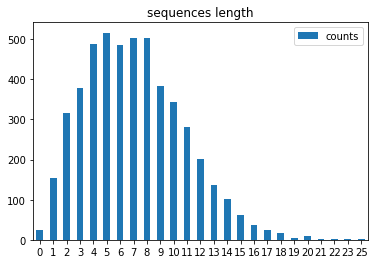

In [73]:
###check length of sequence
import matplotlib.pyplot as plt
text_len = [len(x) for x in sequences]
histo = pd.Series(text_len).value_counts()
histo.sort_index(inplace=True)
histo = pd.DataFrame(histo,columns = ['counts'])
plt.figure(figsize=(8,6))
histo[0:25].plot.bar()
plt.xticks(rotation=360)
plt.title('sequences length')
plt.show()

In [74]:
#pad or cut each sequence to proper length
sequence_len = int(8) 
from keras.preprocessing.sequence import pad_sequences
train = pad_sequences(sequences, maxlen=sequence_len)
train[0:4]

array([[   0,    0,    0, 2333,  518,  216,  389,  110],
       [1051,  633, 3522, 1774,  769,  770, 3523,  634],
       [1776,  362,   23,   54,  390,  693,  265, 1052],
       [  17,   17,   17, 2337,  771, 2338,  175,  931]])

In [75]:
###Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['emotion'])
print('check label: \n', le.classes_)
print('\n### Before convert')
print('data[emotion]:\n', data['emotion'][0:5])
print('\n data[emotion].shape: ', data['emotion'].shape)
#transform sentumental label to one-hot label
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
data_label = label_encode(le, data['emotion'])
print('\n\n### After convert')
print('data_label:\n', data_label[0:5])
print('\n data_label.shape: ', data_label.shape)

check label: 
 ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

### Before convert
data[emotion]:
 1095175    anticipation
1348611             joy
1251743           anger
14445               joy
362125            anger
Name: emotion, dtype: object

 data[emotion].shape:  (4987,)


### After convert
data_label:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

 data_label.shape:  (4987, 8)


In [76]:
###split train,valid set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, data_label, 
                                                    test_size=0.25,shuffle = True,random_state = 17)
print('train data_size:', X_train.shape)
print('test data_size:', X_test.shape)

train data_size: (3740, 8)
test data_size: (1247, 8)


In [77]:
###deep learning
#input is padded sequence,output is one-hot label
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)
output_shape = len(le.classes_)
print('output_shape: ', output_shape)

input_shape:  8
output_shape:  8


In [78]:
#import the package we needed
from keras.models import Model
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import LSTM,Activation,concatenate,Input
from keras.models import load_model
from keras import optimizers 
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.callbacks import CSVLogger,EarlyStopping,ModelCheckpoint
csv_logger = CSVLogger('training_log.csv')

In [79]:
###use GPU to accelerate training
#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [80]:
#hyper parameters
learning_rate = 0.001
epochs = 50
batch_size = 512
#build CNN-LSTM model
model_input = Input(shape = (input_shape,))
embed = Embedding(output_dim=32,
                    input_dim=vocabulary_size+1, 
                    input_length=input_shape)(model_input)
BN1 = BatchNormalization()(embed)
cnn2=Conv1D(filters=64, kernel_size=2,padding='same',activation='relu')(BN1)                     
MP2 = MaxPooling1D(pool_size=2)(cnn2)
cnn3=Conv1D(filters=64, kernel_size=3,padding='same',activation='relu')(BN1)                
MP3 = MaxPooling1D(pool_size=2)(cnn3)
cnnn=Conv1D(filters=64, kernel_size=6,padding='same',activation='relu')(BN1)                    
MPn = MaxPooling1D(pool_size=1)(cnnn)
cnn_out = concatenate([MP2,MP3,MPn], axis=-2)
LSTM1 = LSTM(units=128,unroll = True, recurrent_initializer='orthogonal',
             return_sequences=False,
               dropout=0.2, recurrent_dropout=0.2)(cnn_out)
LSTM1_BN = BatchNormalization()(LSTM1)
FC1 = Dense(units=512)(LSTM1_BN)
FC1_BN = BatchNormalization()(FC1)
Activate  = Activation('relu')(FC1_BN)
Drop = Dropout(0.5)(Activate)
FC2 = Dense(units=output_shape,activation='softmax' )(Drop)
model = Model(inputs=model_input, outputs=FC2)
print(model.summary())


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 8, 32)        160032      input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 8, 32)        128         embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 8, 64)        4160        batch_normalization_7[0][0]      
__________________________________________________________________________________________________
conv1d_8 (

In [81]:
# define loss function & optimizer
adam = optimizers.Adam(lr=learning_rate)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
###callback csv_logger,Modelcheckpoint and Earlystopping
earlystopping=EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
#BEST_MODEL_DIR = "C:/Users/user/Downloads/DMHW2/best_lstm.h5"
#save_best = ModelCheckpoint(BEST_MODEL_DIR, monitor='val_loss', verbose=0,
#                            save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [83]:
#train the model
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger,earlystopping],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3740 samples, validate on 1247 samples
Epoch 1/50
3740/3740 [==============================] - 9s 2ms/step - loss: 2.4977 - acc: 0.1797 - val_loss: 1.8246 - val_acc: 0.3336
Epoch 2/50
3740/3740 [==============================] - 1s 266us/step - loss: 2.1615 - acc: 0.3008 - val_loss: 1.7955 - val_acc: 0.3432
Epoch 3/50
3740/3740 [==============================] - 1s 267us/step - loss: 2.0022 - acc: 0.3190 - val_loss: 1.7735 - val_acc: 0.3376
Epoch 4/50
3740/3740 [==============================] - 1s 265us/step - loss: 1.8909 - acc: 0.3332 - val_loss: 1.7707 - val_acc: 0.3504
Epoch 5/50
3740/3740 [==============================] - 1s 265us/step - loss: 1.7625 - acc: 0.3751 - val_loss: 1.8235 - val_acc: 0.3665
Epoch 6/50
3740/3740 [==============================] - 1s 266us/step - loss: 1.6112 - acc: 0.4297 - val_loss: 1.8236 - val_acc: 0.3785
Epoch 7/50
3740/3740 [==============================] - 1s 265us/step - loss: 1.4521 - acc: 0.4888 - val_loss: 1.8457 - val_acc: 0.3713
Ep

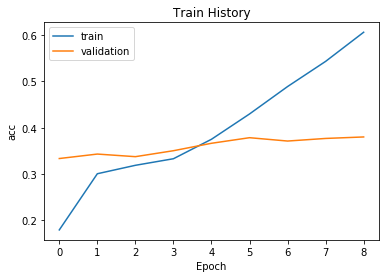

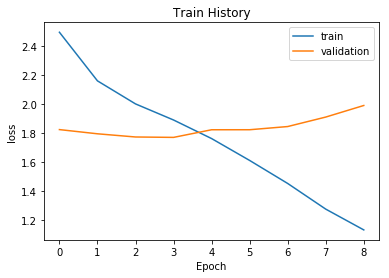

In [84]:
def show_train_history(train_history, train, validation):
    fig = plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    


show_train_history(history, 'acc', 'val_acc',)
show_train_history(history, 'loss', 'val_loss')

In [85]:
###predict on public test set and creat submission file
###load the model
#SAVE_MODEL_DIR = "best_lstm.h5"
#model = load_model(SAVE_MODEL_DIR)

In [86]:
###tokenize test data and generate the sequence 
test_sequences = tokenizer.texts_to_sequences(testdata['text'])
_testdata = pad_sequences(test_sequences, maxlen=sequence_len)
pred_result = model.predict(_testdata, batch_size=512)
pred_result = label_decode(le, pred_result)
pred = pd.Series(pred_result)
testdata.reset_index(inplace = True)
testdata['emotion']=pred
#testdata.drop(['text'],axis = 1,inplace = True)
#testdata.to_csv('prediction.csv',index = 0)
testdata[0:5]

,index,id,emotion
0,61554,0x20bfd8,trust
1,65635,0x210901,trust
2,391500,0x37933a,sadness
3,377303,0x369348,anticipation
4,262054,0x2e9880,sadness


I finally got 0.44076 acc on kaggle competition.

At first, I tried to stack serval Dense layers to build a fully-connected model,but it got bad performance(0.40~0.42)

So I tried SimpleRNN , LSTM,Bidirectional LSTM ,it slightly increase the acc(0.42~0.44) ,but it took longer time(about 30mins/epoch)

At last,I decided to cascade CNN and LSTM together to accelerare convergence speed,and keep the performance.

I discovered that different embedding output_dim(I thought that refer to the dimentionality of data),different units of each layer(CNN,LSTM,Dense),different hyperparameter(learning rate,batchsize),and use Early stopping in order to prevent from over-fitting

but it seems not very effective,it really disappoint me

this competition is quite challenging for me, but inspire me a lot

Hope that I could do better in final project 👍